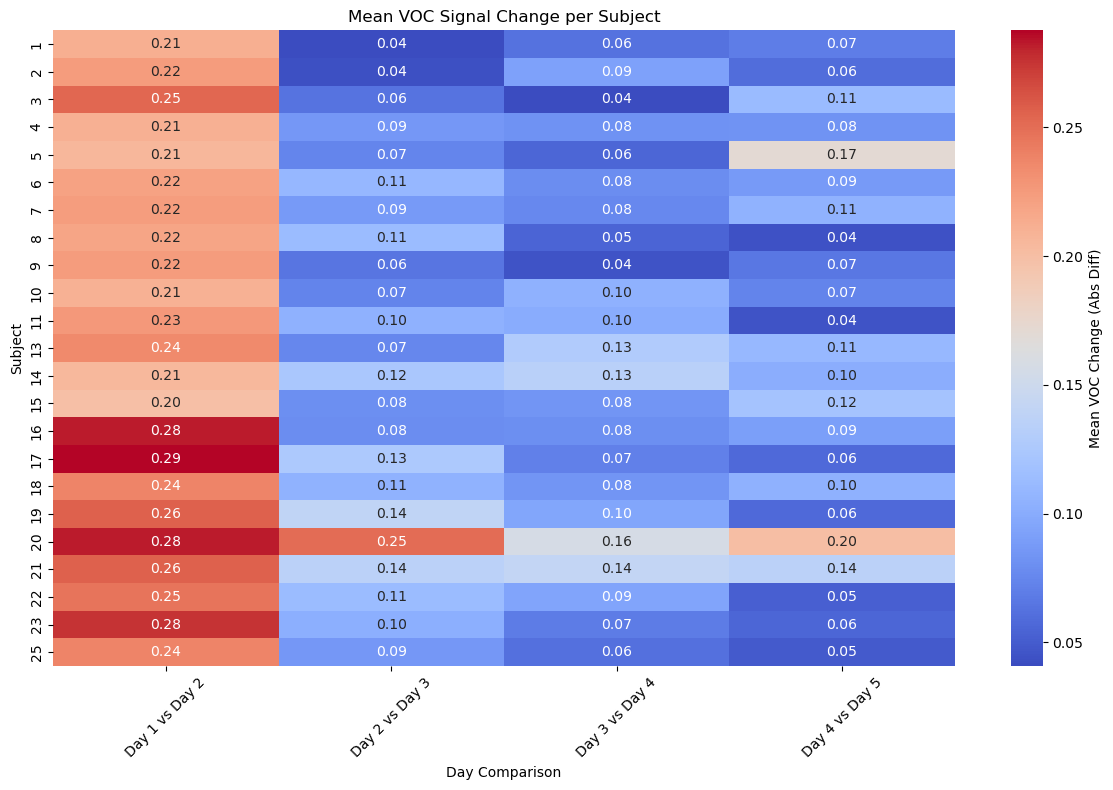

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_csv("DATA VERVAL Scripie Leyla.csv", sep=";")

# Setup
area_cols = [col for col in df.columns if col.startswith("Area")]
subjects = df["Subject"].unique()
day_pairs = [(1, 2), (2, 3), (3, 4), (4, 5)]

results = []

# Loop per subject and per day-pair
for subj in subjects:
    df_subj = df[df["Subject"] == subj]
    
    for d1, d2 in day_pairs:
        diffs = []
        for area in area_cols:
            try:
                val1 = df_subj[df_subj["Day"] == d1][area].values[0]
                val2 = df_subj[df_subj["Day"] == d2][area].values[0]
                if np.isnan(val1) or np.isnan(val2):
                    continue
                diff = abs(val2 - val1)
                diffs.append(diff)
            except:
                continue
        
        avg_diff = np.mean(diffs) if diffs else 0
        results.append({
            "Subject": subj,
            "Comparison": f"Day {d1} vs Day {d2}",
            "avg_diff": avg_diff
        })

# Convert to DataFrame
df_diff = pd.DataFrame(results)

# Pivot to matrix
heatmap_data = df_diff.pivot(index="Subject", columns="Comparison", values="avg_diff")
heatmap_data = heatmap_data.sort_index()

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"label": "Mean VOC Change (Abs Diff)"})
plt.title("Mean VOC Signal Change per Subject")
plt.xlabel("Day Comparison")
plt.ylabel("Subject")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/f7/b85939sn3vbc4rw24zgjczkw0000gn/T/ipykernel_3456/1274173880.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_pvals["-log10(p)"].replace([np.inf, -np.inf], 0, inplace=True)
/var/folders/f7/b85939sn3vbc4rw24zgjczkw0000gn/T/ipykernel_3456/1274173880.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

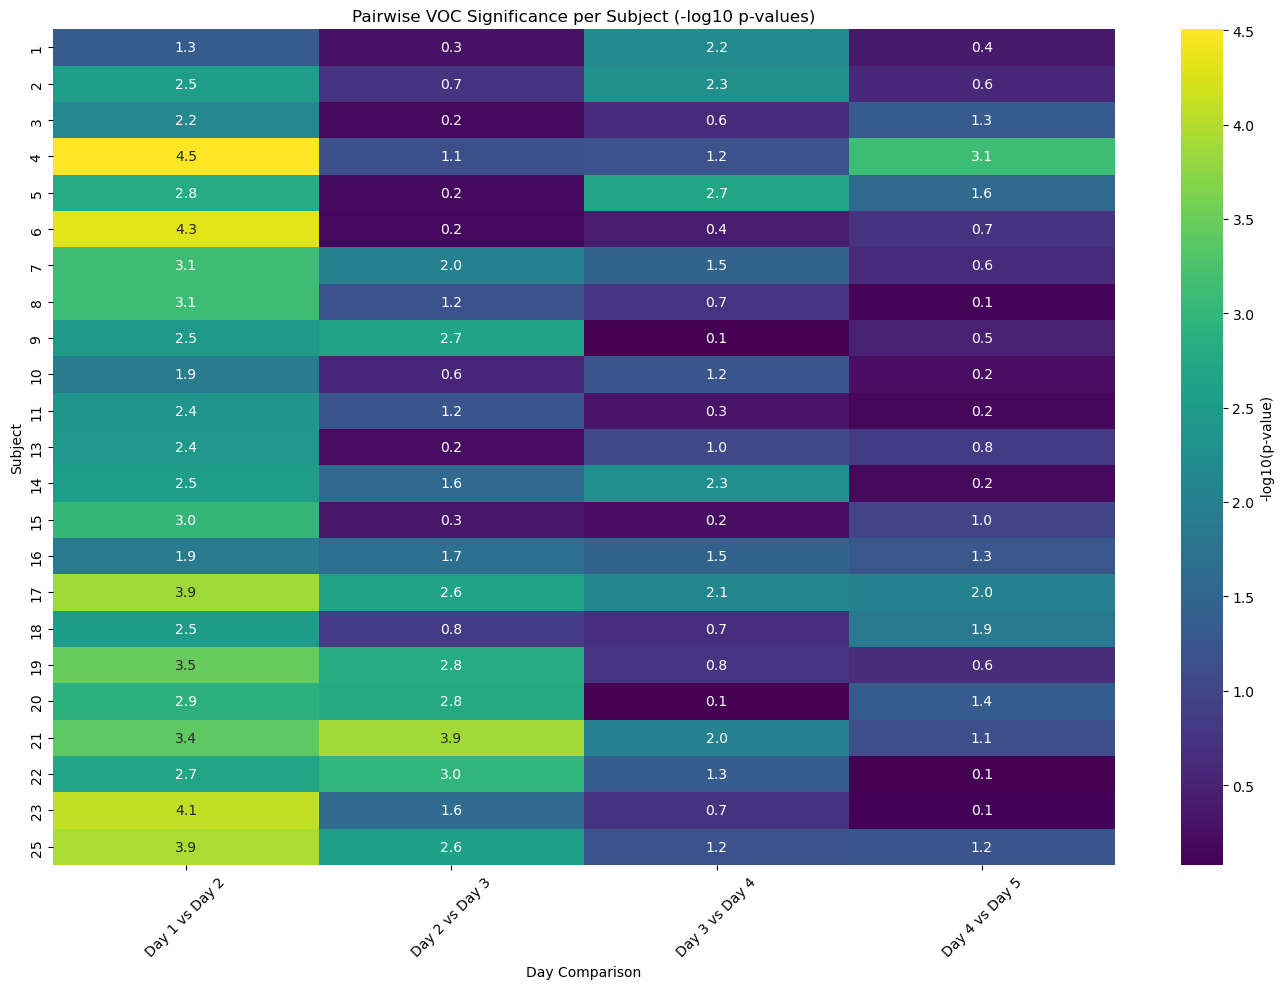

In [5]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_rel
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("DATA VERVAL Scripie Leyla.csv", sep=";")

# Identify area columns and subject list
area_cols = [col for col in df.columns if col.startswith("Area")]
subjects = df["Subject"].unique()
day_pairs = [(1, 2), (2, 3), (3, 4), (4, 5)]

results = []

# Loop per subject and day-pair
for subj in subjects:
    df_subj = df[df["Subject"] == subj]

    for d1, d2 in day_pairs:
        day1 = df_subj[df_subj["Day"] == d1][area_cols]
        day2 = df_subj[df_subj["Day"] == d2][area_cols]

        if len(day1) == 1 and len(day2) == 1:
            vals1 = day1.values.flatten()
            vals2 = day2.values.flatten()

            # Paired t-test across 145 areas
            stat, pval = ttest_rel(vals1, vals2)

            results.append({
                "Subject": subj,
                "Comparison": f"Day {d1} vs Day {d2}",
                "p_value": pval
            })

# Create DataFrame and transform to -log10(p)
df_pvals = pd.DataFrame(results)
df_pvals["-log10(p)"] = -np.log10(df_pvals["p_value"])
df_pvals["-log10(p)"].replace([np.inf, -np.inf], 0, inplace=True)
df_pvals["-log10(p)"].fillna(0, inplace=True)

# Pivot to heatmap format
heatmap_data = df_pvals.pivot(index="Subject", columns="Comparison", values="-log10(p)")
heatmap_data = heatmap_data.sort_index()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="viridis", cbar_kws={"label": "-log10(p-value)"})
plt.title("Pairwise VOC Significance per Subject (-log10 p-values)")
plt.xlabel("Day Comparison")
plt.ylabel("Subject")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


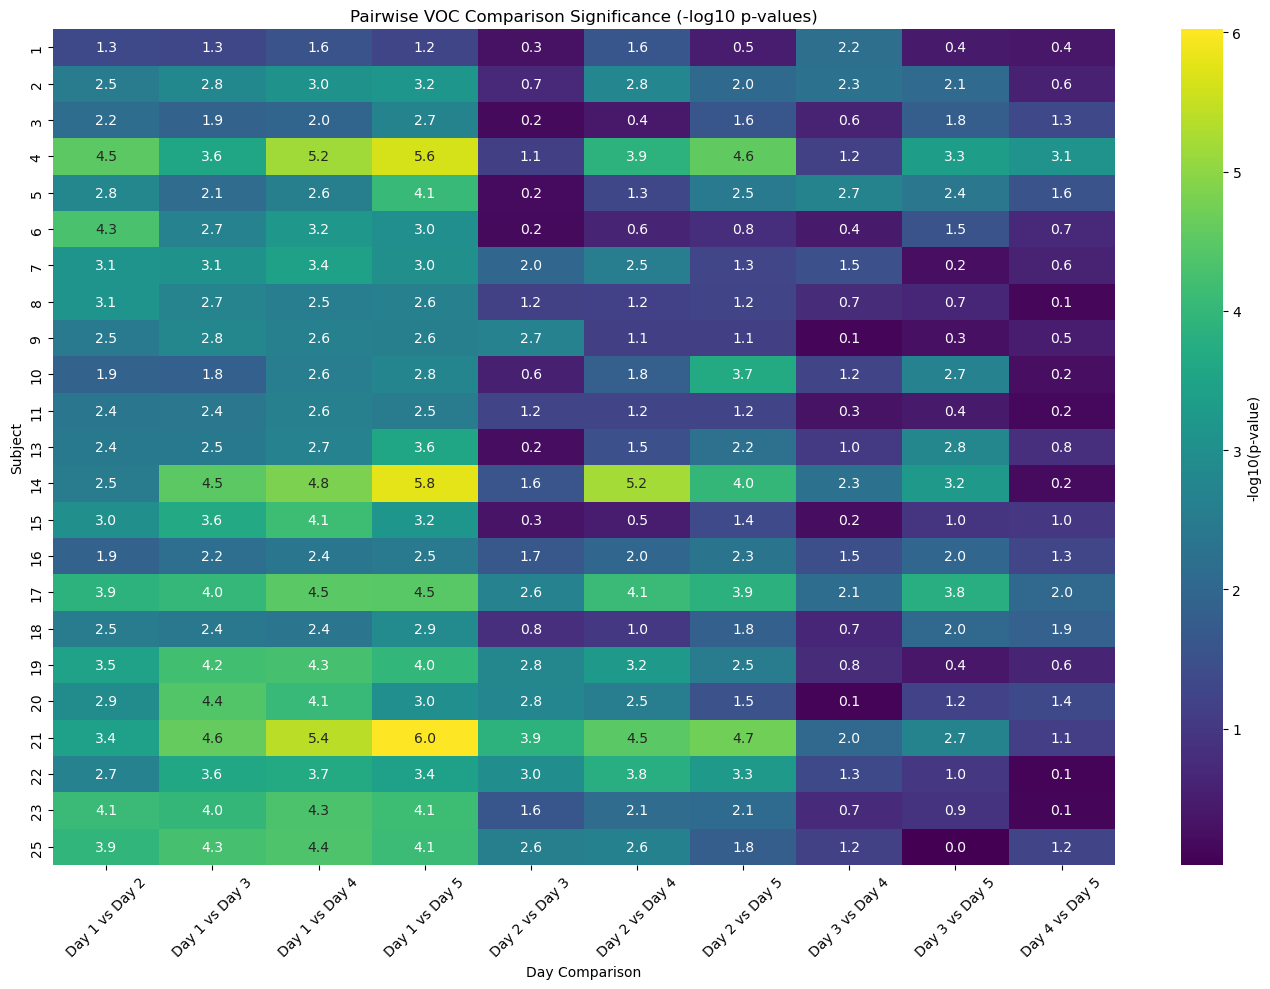

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel

# Load the dataset
df = pd.read_csv("DATA VERVAL Scripie Leyla.csv", sep=";")

# Extract all VOC area columns
area_cols = [col for col in df.columns if col.startswith("Area")]

# Initialize list to store results
results = []

# Loop over each subject
for subject in df["Subject"].unique():
    subj_df = df[df["Subject"] == subject].sort_values("Day")

    # Generate all day comparisons: 1v2, 1v3, ..., 4v5
    for d1 in range(1, 5):
        for d2 in range(d1 + 1, 6):
            day1 = subj_df[subj_df["Day"] == d1][area_cols].values.flatten()
            day2 = subj_df[subj_df["Day"] == d2][area_cols].values.flatten()

            # Paired t-test
            t_stat, p_val = ttest_rel(day1, day2, nan_policy='omit')
            if np.isnan(p_val): p_val = 1

            results.append({
                "Subject": subject,
                "Comparison": f"Day {d1} vs Day {d2}",
                "p_value": p_val
            })

# Create DataFrame and calculate -log10(p)
df_pvals = pd.DataFrame(results)
df_pvals["-log10(p)"] = -np.log10(df_pvals["p_value"])
df_pvals["-log10(p)"] = df_pvals["-log10(p)"].replace([np.inf, -np.inf], 0)
df_pvals["-log10(p)"] = df_pvals["-log10(p)"].fillna(0)

# Pivot to matrix format for heatmap
heatmap_data = df_pvals.pivot(index="Subject", columns="Comparison", values="-log10(p)")
heatmap_data = heatmap_data.sort_index()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="viridis", cbar_kws={"label": "-log10(p-value)"})
plt.title("Pairwise VOC Comparison Significance (-log10 p-values)")
plt.xlabel("Day Comparison")
plt.ylabel("Subject")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


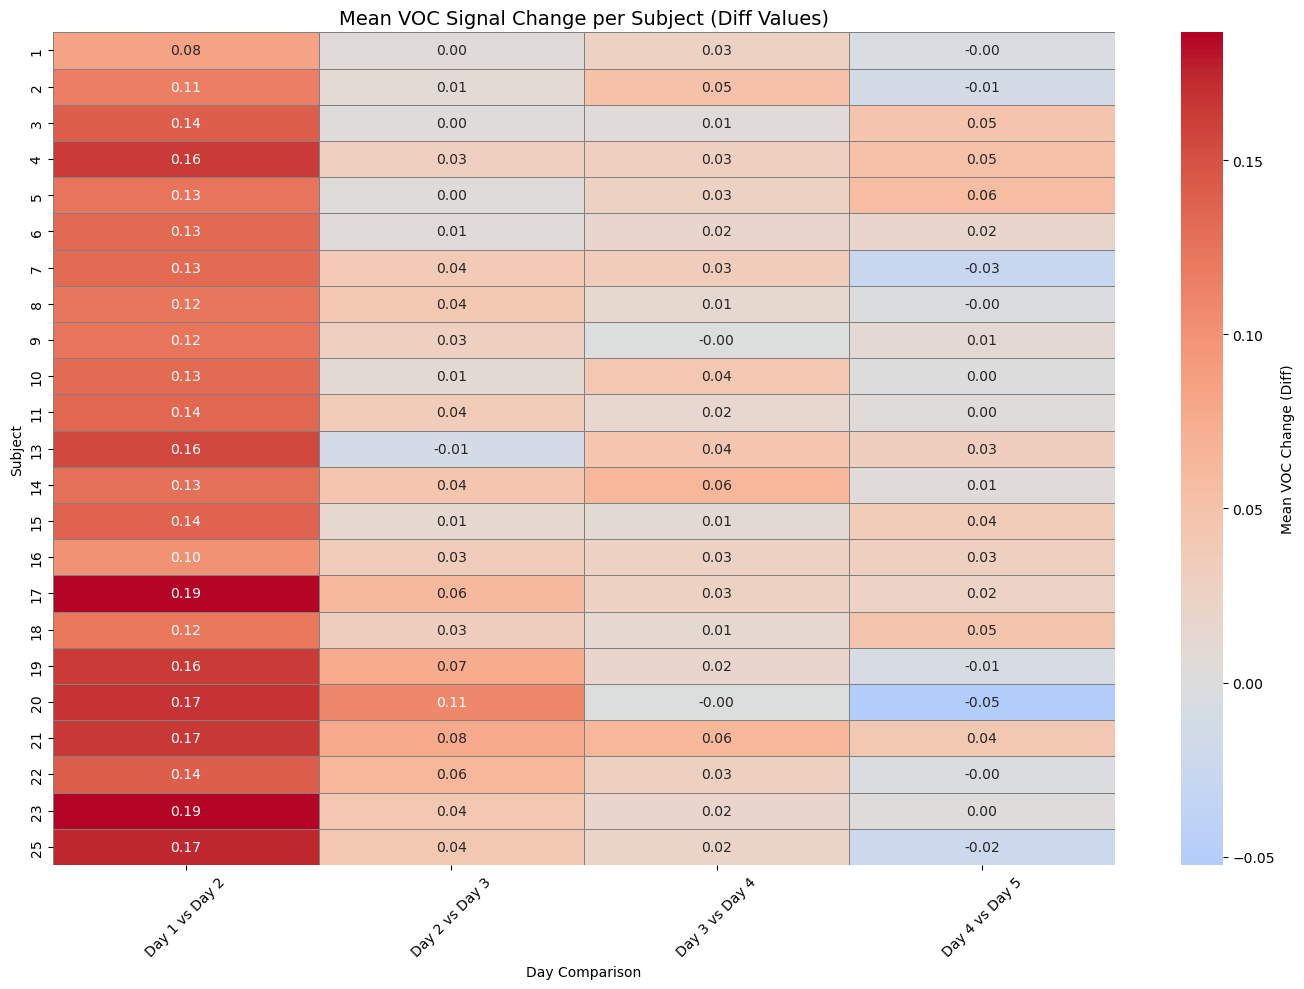

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# === Load the file with VOC change (Diff) values ===
df = pd.read_csv("DATA UTF.csv", sep=";")

# === Clean 'Diff' values ===
df["Diff"] = df["Diff"].str.replace(",", ".").astype(float)

# === Group by Subject and Comparison and average over areas ===
heatmap_diff = df.groupby(["Subject", "Comparison"])["Diff"].mean().reset_index()

# === Pivot to matrix: subjects as rows, comparisons as columns ===
heatmap_matrix_diff = heatmap_diff.pivot(index="Subject", columns="Comparison", values="Diff")

# === Plot the heatmap ===
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_matrix_diff,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            center=0,  # zero-centered for up/down shifts
            linewidths=0.5,
            linecolor="gray",
            cbar_kws={"label": "Mean VOC Change (Diff)"})

plt.title("Mean VOC Signal Change per Subject (Diff Values)", fontsize=14)
plt.xlabel("Day Comparison")
plt.ylabel("Subject")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()